In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df2=df[['survived','pclass','age','parch']]
df2.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [4]:
df3=df2.fillna(df2.mean())

In [5]:
X=df3.drop('survived',axis=1)
Y=df3['survived']
print('shape of X: ',X.shape)
print('shape of Y: ',Y.shape)

shape of X:  (891, 3)
shape of Y:  (891,)


In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=51)
print('shape of X_train: ',X_train.shape)
print('shape of X_test: ',X_test.shape)
print('shape of Y_train: ',Y_train.shape)
print('shape of Y_test: ',Y_test.shape)

shape of X_train:  (712, 3)
shape of X_test:  (179, 3)
shape of Y_train:  (712,)
shape of Y_test:  (179,)


In [7]:
sc=StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
sc.mean_

array([ 2.30617978, 29.55409121,  0.39185393])

In [9]:
sc.scale_

array([ 0.84405789, 12.99162985,  0.79647463])

In [10]:
X_train.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,2.306180,29.554091,0.391854
std,0.844651,13.000763,0.797035
min,1.000000,0.420000,0.000000
25%,1.750000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,71.000000,5.000000


In [12]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [13]:
X_train_sc

array([[ 0.8220055 , -0.42751304, -0.49198545],
       [ 0.8220055 ,  1.997125  , -0.49198545],
       [ 0.8220055 , -1.42815732, -0.49198545],
       ...,
       [ 0.8220055 ,  1.41983023,  3.27461284],
       [ 0.8220055 ,  0.01116307,  0.76354731],
       [ 0.8220055 , -0.08113618, -0.49198545]])

In [14]:
X_train_sc = pd.DataFrame(X_train_sc,columns=['pclass','age','parch'])
X_test_sc = pd.DataFrame(X_test_sc,columns = ['pclass','age','parch'])

In [15]:
X_train_sc.head()

,pclass,age,parch
0,0.822005,-0.427513,-0.491985
1,0.822005,1.997125,-0.491985
2,0.822005,-1.428157,-0.491985
3,0.822005,-0.889349,-0.491985
4,0.822005,0.011163,2.019080


In [16]:
X_train_sc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.55,-2.24,-0.49
25%,-0.66,-0.58,-0.49
50%,0.82,0.01,-0.49
75%,0.82,0.42,-0.49
max,0.82,3.19,5.79


In [17]:
mmc = MinMaxScaler()
mmc.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [18]:
X_train_mmc = mmc.transform(X_train)
X_test_mmc = mmc.transform(X_test)

In [19]:
X_train_mmc

array([[1.        , 0.33408898, 0.        ],
       [1.        , 0.78039105, 0.        ],
       [1.        , 0.14990082, 0.        ],
       ...,
       [1.        , 0.67412865, 0.6       ],
       [1.        , 0.4148359 , 0.2       ],
       [1.        , 0.39784642, 0.        ]])

In [20]:
X_train_mmc = pd.DataFrame(X_train_mmc,columns=['pclass','age','parch'])
X_test_mmc = pd.DataFrame(X_test_mmc,columns = ['pclass','age','parch'])

In [21]:
X_train_mmc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.65,0.41,0.08
std,0.42,0.18,0.16
min,0.00,0.00,0.00
25%,0.38,0.31,0.00
50%,1.00,0.41,0.00
75%,1.00,0.49,0.00
max,1.00,1.00,1.00


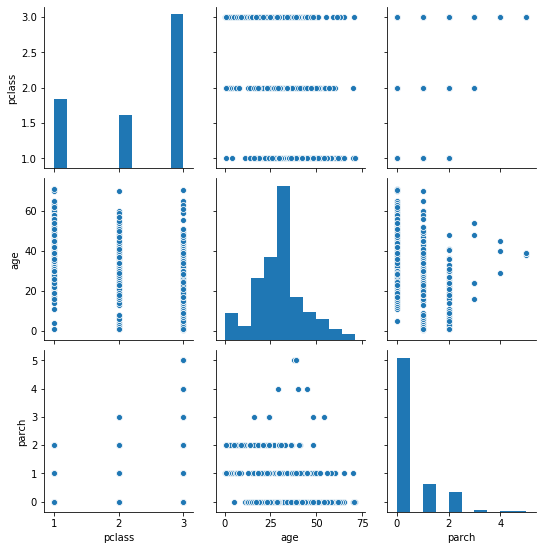

In [22]:
sns.pairplot(X_train)

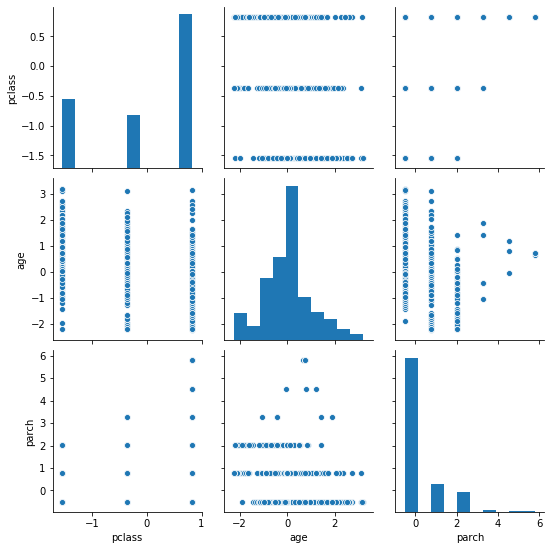

In [23]:
sns.pairplot(X_train_sc)

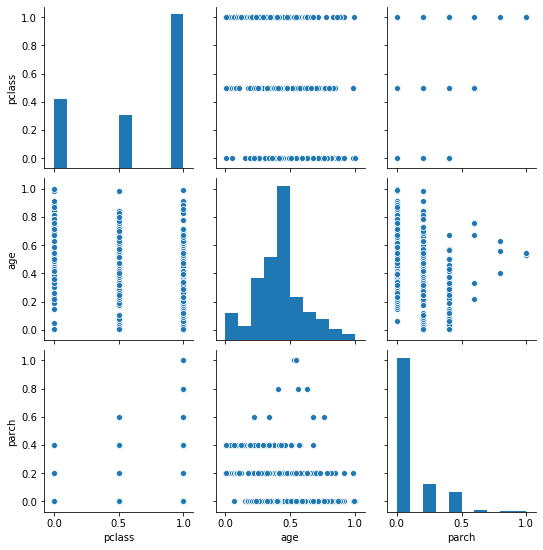

In [24]:
sns.pairplot(X_train_mmc)

Original data not changed# 